In [43]:
#importing the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import nltk
import os
import gensim
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from gensim.models.wrappers import LdaMallet

In [44]:
#loading the textual data of the abstracts etc
text_data = []
with open(r"C:\Users\Owoseni Timileyin\Desktop\Covenant Masters\Thesis\Ecommerce\MainProject\FinalData\TimiAdjusted10k.csv", errors="ignore") as f:
    for line in f:
        text_data.append(line)
len(text_data)

10966

In [45]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['wa','ha','one','two','three','tablet','fire','kindle','say','far','get','right',
                   'from','said','amazon','plus','go','want','take','using','set','first','second',
                  'much','use','carry','prime','bought','anyone','looking','daily','definitely',
                  'really','another','boy','buy','girl','buying','also','came','keep','kept','could',
                   'still','seems','okay','ok','yet','nothing','instead','little','got','item','ever',
                   'brought','well','very','doe','lot','quite','thing','otherwise','nook','book','fact',
                   'exactly','allow','many','wanted','would','went','maybe','sometimes','found','always',
                   'cannot','also','new','every','opening','expecting','table','second','gave','given',
                   'buying','kept','keep','used','mostly','carry','around','week','everyday','tv',
                   'firsdt','stick','iit','need','strongly','strong','almost','older','old','actually',
                  'plenty','added','add','told','tell','searching','way','turn','try','else','hd','may',
                  'hink','see','even','think','took','take','due','made','kindles','fires','ago','already',
                  'us','me','lol','pick','bed','hit','side','wish','add','give','gave','away','thought',
                  'etc','mainly','within','find','fall','taking','put','day','since','owned','adding',
                  'either','next','saw','often','open','front','however','bit','addional','month','year',
                  'sure','several','know','box','sure','let','place','getting','never','box','completely',
                   'run','firestick','purchased','purchase','work','everything','device','product','asked','order',
                   'mean','app','application','apps','purpose','time','able','bedroom','le','especially',
                  'deal','cut','expected','anything','different','make','without','top','difference','look','back',
                   'needed','point','onto','start','couple','hold','show','including','outside','inside',
                   'typical','command'])
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalize_corpus(text_data):
    norm_text = []
    for text in text_data:
        text = text.lower()
        text_tokens = [token.strip() for token in wtk.tokenize(text)]
        text_tokens = [wnl.lemmatize(token) for token in text_tokens if not token.isnumeric()]
        text_tokens = [token for token in text_tokens if len(token) > 1]
        text_tokens = [token for token in text_tokens if token not in stop_words]
        text_tokens = list(filter(None, text_tokens))
        if text_tokens:
            norm_text.append(text_tokens)

    return norm_text

norm_text = normalize_corpus(text_data)
print(len(norm_text))

10959


In [46]:
#Text Representation with Feature Engineering
#Before feature engineering and vectorization, we want to extract some useful bi-gram 
#based phrases from our research papers and remove some unnecessary terms. W

import gensim
bigram = gensim.models.Phrases(norm_text, min_count=20, threshold=20) # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_text]
# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
print('Total Vocabulary Size:', len(dictionary)) 

Sample word to number mappings: [(0, 'basic'), (1, 'checking_email'), (2, 'ebooks'), (3, 'good'), (4, 'reading'), (5, 'web_browsing'), (6, 'great'), (7, 'love'), (8, 'reader'), (9, 'recommend'), (10, 'surfing_web'), (11, 'easy'), (12, 'local'), (13, 'price'), (14, 'reasonable')]
Total Vocabulary Size: 5925
Total Vocabulary Size: 676


In [47]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(3, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1)]


In [48]:
#Latent Dirichlet Allocation STARTS HERE
#We use Gensim in the following implementation to build an LDA-based topic model on our 
#research paper based corpus.
TOTAL_TOPICS = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1740, alpha='auto', eta='auto', random_state=42, iterations=500, num_topics=TOTAL_TOPICS, passes=20, eval_every=None)


In [49]:
#Viewing the topics in our trained topic model is quite easy and we can generate them with the following code.
for topic_id, topic in lda_model.print_topics(num_topics=10, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.098*"reading" + 0.045*"internet" + 0.032*"reader" + 0.028*"wife" + 0.025*"web" + 0.024*"wifi" + 0.024*"email" + 0.021*"like" + 0.020*"phone" + 0.020*"online" + 0.019*"playing_game" + 0.018*"video" + 0.018*"simple" + 0.018*"watching" + 0.015*"browsing" + 0.014*"read" + 0.013*"surfing" + 0.013*"hard" + 0.012*"connect" + 0.011*"computer"

Topic #2:
0.193*"kid" + 0.142*"game" + 0.085*"play" + 0.056*"child" + 0.040*"video" + 0.037*"download" + 0.031*"watch" + 0.029*"movie" + 0.025*"free" + 0.022*"netflix" + 0.019*"beginner" + 0.018*"music" + 0.016*"adult" + 0.015*"youtube" + 0.014*"learning" + 0.012*"clear" + 0.012*"highly_recommend" + 0.012*"complaint" + 0.011*"young" + 0.009*"great"

Topic #3:
0.065*"money" + 0.051*"issue" + 0.039*"memory" + 0.039*"storage" + 0.034*"problem" + 0.029*"charge" + 0.025*"battery" + 0.022*"sd_card" + 0.020*"card" + 0.019*"must" + 0.017*"unit" + 0.016*"extra" + 0.016*"apple" + 0.014*"charging" + 0.014*"space" + 0.014*"replacement" + 0.014*"micro_sd"

In [50]:
#We can also view the overall mean coherence score of the model.
import numpy as np
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -5.394802373576326


In [51]:
#. Let’s now look at the output of our LDA topic model in an easier to understand format. One 
# way is to visualize the topics as tuples of terms and weights.
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('good', 0.184), ('screen', 0.069), ('nice', 0.049), ('quality', 0.037), ('better', 0.036), ('fast', 0.027), ('camera', 0.026), ('price', 0.022), ('cheap', 0.022), ('picture', 0.021), ('like', 0.02), ('battery_life', 0.018), ('pretty', 0.017), ('basic', 0.017), ('resolution', 0.014), ('decent', 0.014), ('inexpensive', 0.014), ('overall', 0.014), ('display', 0.011), ('enough', 0.01)]

Topic #2:
[('reading', 0.098), ('internet', 0.045), ('reader', 0.032), ('wife', 0.028), ('web', 0.025), ('wifi', 0.024), ('email', 0.024), ('like', 0.021), ('phone', 0.02), ('online', 0.02), ('playing_game', 0.019), ('video', 0.018), ('simple', 0.018), ('watching', 0.018), ('browsing', 0.015), ('read', 0.014), ('surfing', 0.013), ('hard', 0.013), ('connect', 0.012), ('computer', 0.011)]

Topic #3:
[('store', 0.065), ('like', 0.054), ('android', 0.045), ('ad', 0.038), ('available', 0.024), ('slow', 0.023), ('though', 0.022), ('fine', 0.022), ('account', 0.022), ('google_pl

In [52]:
#We can also view the topics as a list of terms without the weights when we want to 
#understand the context or theme conveyed by each topic.
print('LDA Topics without Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([term for wt, term in topic])
    print()

LDA Topics without Weights
Topic #1:
['good', 'screen', 'nice', 'quality', 'better', 'fast', 'camera', 'price', 'cheap', 'picture', 'like', 'battery_life', 'pretty', 'basic', 'resolution', 'decent', 'inexpensive', 'overall', 'display', 'enough']

Topic #2:
['reading', 'internet', 'reader', 'wife', 'web', 'wifi', 'email', 'like', 'phone', 'online', 'playing_game', 'video', 'simple', 'watching', 'browsing', 'read', 'surfing', 'hard', 'connect', 'computer']

Topic #3:
['store', 'like', 'android', 'ad', 'available', 'slow', 'though', 'fine', 'account', 'google_play', 'version', 'google', 'streaming', 'user', 'working', 'star', 'pay', 'access', 'big', 'reason']

Topic #4:
['kid', 'game', 'play', 'child', 'video', 'download', 'watch', 'movie', 'free', 'netflix', 'beginner', 'music', 'adult', 'youtube', 'learning', 'clear', 'highly_recommend', 'complaint', 'young', 'great']

Topic #5:
['love', 'perfect', 'read', 'son', 'daughter', 'like', 'size', 'gift', 'small', 'grandson', 'mom', 'granddaug

In [53]:
#We can use perplexity and coherence scores as measures to evaluate the topic 
#model. Typically, lower the perplexity, the better the model. Similarly, the lower the 
#UMass score and the higher the Cv score in coherence, the better the model.

cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, texts=norm_corpus_bigrams, dictionary=dictionary,coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()
umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, texts=norm_corpus_bigrams, dictionary=dictionary,coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.37887031025013307
Avg. Coherence Score (UMass): -5.394802373576327
Model Perplexity: -5.687983083338272


In [54]:
from tqdm import tqdm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        

    return model_list, coherence_values

In [55]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=norm_corpus_bigrams, start=2, limit=30, step=1)

In [56]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=norm_corpus_bigrams):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=norm_corpus_bigrams)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\Owoseni Timileyin\AppData\Local\Temp\ipykernel_8376\142452186.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Owoseni Timileyin\AppData\Local\Temp\ipykernel_8376\142452186.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               8              0.3287   
1            1               5              0.2471   
2            2               5              0.2581   
3            3               8              0.3606   
4            4               1              0.3170   
5            5               5              0.2812   
6            6               0              0.3123   
7            7               1              0.3323   
8            8               5              0.2371   
9            9               5              0.2230   

                                            Keywords  \
0  good, screen, nice, quality, better, fast, cam...   
1  great, price, value, black_friday, excellent, ...   
2  great, price, value, black_friday, excellent, ...   
3  good, screen, nice, quality, better, fast, cam...   
4  kid, game, play, child, video, download, watch...   
5  great, price, value, black_friday, excellent, ...   
6  reading, internet, reader, wife, web, wifi, em...   
7  kid, game, play, child, video, download, watch...   
8  great, price, value, black_friday, excellent, ...   
9  great, price, value, black_friday, excellent, ...   

                                                Text  
0  [good, basic, checking_email, web_browsing, re...  
1  [love, great, recommend, great, reader, good, ...  
2  [local, store, replace, suggested, love, easy,...  
3                       [good, inexpensive, someone]  
4  [niece, sturdy, enough, kid, play, game, watch...  
5               [great, kid, great, learning, store]  
6  [toddler, best, investment, protection, plan, ...  
7  [replace, phone, kid, love, watch, video, grea...  
8  [great, senior, overly, complicated, screen, s...  
9  [nice, price, son, birthday, opened, brother, ...

In [57]:
#the most representative sentence for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.5424   
1          1              0.5556   
2          2              0.5949   
3          3              0.6793   
4          4              0.6151   
5          5              0.6859   
6          6              0.6236   
7          7              0.4860   
8          8              0.7390   
9          9              0.5091   

                                                                                Keywords  \
0                 reading, internet, reader, wife, web, wifi, email, like, phone, online   
1                   kid, game, play, child, video, download, watch, movie, free, netflix   
2           money, issue, memory, storage, problem, charge, battery, sd_card, card, must   
3                  love, perfect, read, son, daughter, like, size, gift, small, grandson   
4                   best, ipad, awesome, cost, amazing, expensive, buck, tab, low, brand   
5          great, price, value, black_friday, excellent, beat, worth, gift, sale, family   
6          store, like, android, ad, available, slow, though, fine, account, google_play   
7         christmas, happy, gift, nephew, case, niece, husband, enjoying, break, replace   
8               good, screen, nice, quality, better, fast, camera, price, cheap, picture   
9  easy, recommend, loved, friend, enjoy, mother, user_friendly, durable, gift, navigate   

                                                                                   Representative Text  
0  [family, friend, simple, certainly, ton, capability, adequate, basic, email, web, surfing, photo...  
1                                               [interested, learning, educational, adult, child, age]  
2                        [bad, worth, battery, horrible, tho, worth, drop, usb, charging, port, issue]  
3                                                      [dad, love, love, love, love, love, love, love]  
4                                      [awesome, awesome, awesome, awesome, awesome, awesome, awesome]  
5                                             [great, great, great, great, great, great, great, great]  
6  [must, rate, star, reason, google_play, store, google, stuck, store, pay, remove, ad, filled, lo...  
7                                                             [christmas, niece, nephew, soo, excited]  
8                                   [good, good, good, good, good, good, good, good, good, good, good]  
9                                                              [grandkids, loved, recommend, everyone]

In [58]:
import pandas as pd
coherence_df = pd.DataFrame({'Number of Topics': range(2, 30, 1),'Coherence Score': np.round(coherence_values, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)


Number of Topics  Coherence Score
7                  9           0.3996
5                  7           0.3820
10                12           0.3759
3                  5           0.3728
13                15           0.3671
12                14           0.3577
11                13           0.3521
15                17           0.3521
6                  8           0.3519
14                16           0.3481

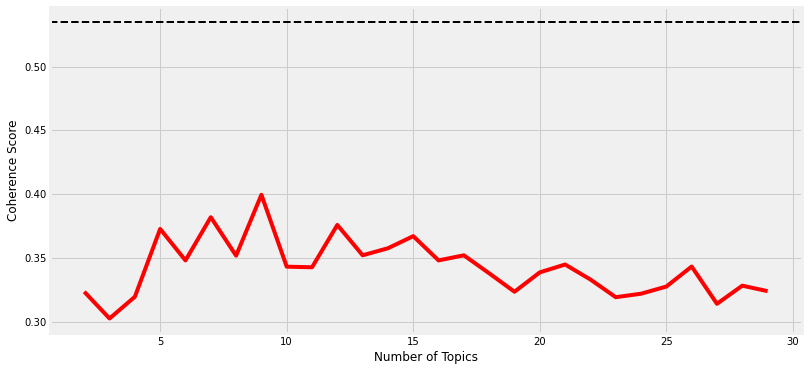

In [59]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 30,1)
y_ax = coherence_values
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.535, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')



In [60]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 9].index[0]
best_lda_model = model_list[best_model_idx]
best_lda_model.num_topics

9

In [61]:
topics = [[(term, round(wt, 3))
            for term, wt in best_lda_model.show_topic(n, topn=20)]
                for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['like', 'best', 'great', 'price', 'love', 'child', 'better', 'store', 'good', 'issue', 'kid', 'daughter', 'awesome', 'ipad', 'small', 'replacement', 'young', 'wife', 'probably', 'learning']

Topic #2:
['great', 'easy', 'love', 'small', 'game', 'memory', 'netflix', 'reading', 'music', 'movie', 'like', 'video', 'fast', 'good', 'feature', 'kid', 'streaming', 'easily', 'travel', 'enough']

Topic #3:
['good', 'price', 'like', 'child', 'low', 'performance', 'android', 'reader', 'kid', 'satisfied', 'nice', 'content', 'slow', 'gift', 'battery', 'speed', 'home', 'someone', 'christmas', 'issue']

Topic #4:
['great', 'price', 'gift', 'love', 'kid', 'loved', 'christmas', 'excellent', 'beat', 'perfect', 'value', 'nephew', 'niece', 'black_friday', 'granddaughter', 'awesome', 'recommend', 'age', 'happy', 'easy']

Topic #5:
['easy', 'great', 'good', 'kid', 'love', 'screen', 'size', 'reading', 'camera', 'navigate', 'read', 'web', 'nice', 'setup', 'perfect', 'like', 'feature', 'price', 'bigge

In [62]:
#A better way of visualizing the topics is to build a term-topic dataframe, as depicted
topics_df = pd.DataFrame([[term for term, wt in topic]
                            for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

Topic 1    Topic 2      Topic 3        Topic 4   Topic 5  \
Term1          like      great         good          great      easy   
Term2          best       easy        price          price     great   
Term3         great       love         like           gift      good   
Term4         price      small        child           love       kid   
Term5          love       game          low            kid      love   
Term6         child     memory  performance          loved    screen   
Term7        better    netflix      android      christmas      size   
Term8         store    reading       reader      excellent   reading   
Term9          good      music          kid           beat    camera   
Term10        issue      movie    satisfied        perfect  navigate   
Term11          kid       like         nice          value      read   
Term12     daughter      video      content         nephew       web   
Term13      awesome       fast         slow          niece      nice   
Term14         ipad       good         gift   black_friday     setup   
Term15        small    feature      battery  granddaughter   perfect   
Term16  replacement        kid        speed        awesome      like   
Term17        young  streaming         home      recommend   feature   
Term18         wife     easily      someone            age     price   
Term19     probably     travel    christmas          happy    bigger   
Term20     learning     enough        issue           easy   picture   

             Topic 6   Topic 7        Topic 8    Topic 9  
Term1          price     great           love        kid  
Term2         screen      game            son      great  
Term3          great      play       daughter      price  
Term4          money     price           game       nice  
Term5           good      good           play       good  
Term6          worth     store      christmas    account  
Term7        reading      ipad          great       game  
Term8           slow      read            kid   download  
Term9           sale   quality           read     better  
Term10       android       kid        perfect      cheap  
Term11           pay     video           gift       easy  
Term12            ad      free        reading       like  
Term13     something     watch     absolutely       fast  
Term14        pretty      like   playing_game     enough  
Term15  black_friday      fast          happy     screen  
Term16       quality   starter            mom  recommend  
Term17          fine      easy  user_friendly    storage  
Term18         basic     apple         friend      movie  
Term19         value      cost       grandson   internet  
Term20     recommend  internet        problem    awesome

In [63]:
#Another easy way to view the topics is to create a topic-term dataframe, whereby 
#each topic is represented in a row with the terms of the topic being represented as a 
#comma-separated string
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                                for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)])
topics_df

C:\Users\Owoseni Timileyin\AppData\Local\Temp\ipykernel_8376\2831310691.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic1  like, best, great, price, love, child, better, store, good, issue, kid, daughter, awesome, ipad, small, replacement, young, wife, probably, learning                
Topic2  great, easy, love, small, game, memory, netflix, reading, music, movie, like, video, fast, good, feature, kid, streaming, easily, travel, enough                    
Topic3  good, price, like, child, low, performance, android, reader, kid, satisfied, nice, content, slow, gift, battery, speed, home, someone, christmas, issue             
Topic4  great, price, gift, love, kid, loved, christmas, excellent, beat, perfect, value, nephew, niece, black_friday, granddaughter, awesome, recommend, age, happy, easy  
Topic5  easy, great, good, kid, love, screen, size, reading, camera, navigate, read, web, nice, setup, perfect, like, feature, price, bigger, picture                       
Topic6  price, screen, great, money, good, worth, reading, slow, sale, android, pay, ad, something, pretty, black_friday, quality, fine, basic, value, recommend            
Topic7  great, game, play, price, good, store, ipad, read, quality, kid, video, free, watch, like, fast, starter, easy, apple, cost, internet                               
Topic8  love, son, daughter, game, play, christmas, great, kid, read, perfect, gift, reading, absolutely, playing_game, happy, mom, user_friendly, friend, grandson, problem
Topic9  kid, great, price, nice, good, account, game, download, better, cheap, easy, like, fast, enough, screen, recommend, storage, movie, internet, awesome

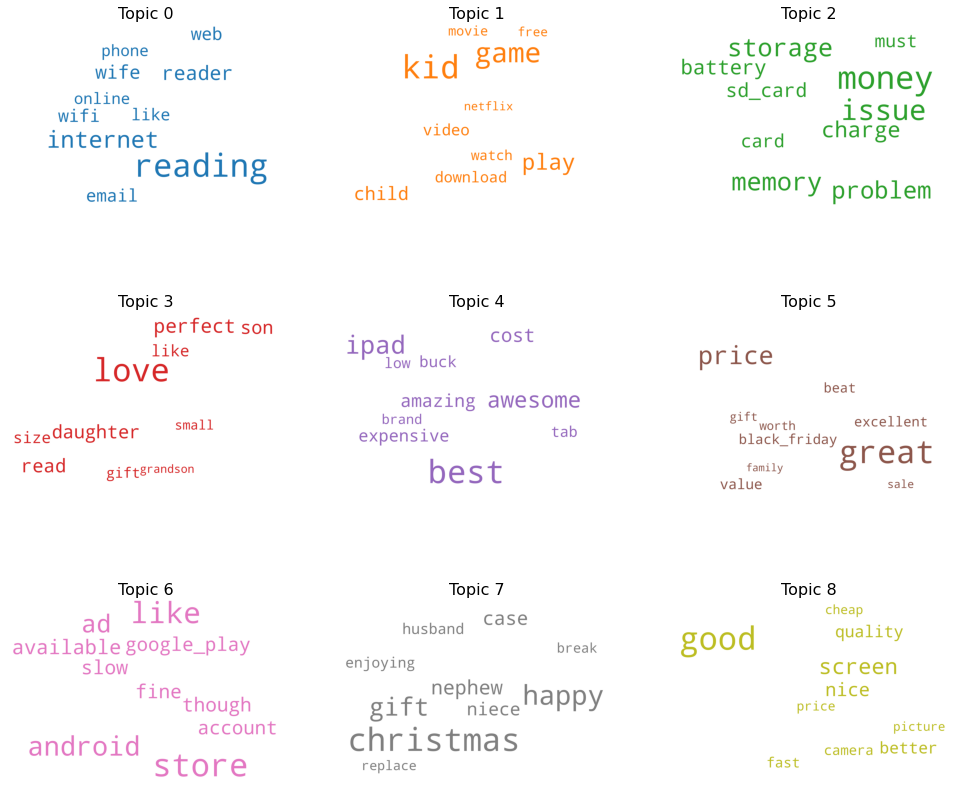

In [64]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2600,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


In [65]:
TOTAL_TOPICS = 9
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1740, alpha='auto', eta='auto', random_state=42, iterations=500, num_topics=TOTAL_TOPICS, passes=20, eval_every=None)


In [66]:
for topic_id, topic in lda_model.print_topics(num_topics=11, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.141*"reading" + 0.061*"black_friday" + 0.058*"beat" + 0.041*"wife" + 0.039*"sale" + 0.032*"expensive" + 0.030*"paid" + 0.025*"watching" + 0.022*"browsing" + 0.021*"web" + 0.019*"surfing" + 0.017*"online" + 0.016*"stuff" + 0.015*"easier" + 0.015*"internet" + 0.013*"watching_movie" + 0.013*"ipad" + 0.012*"fantastic" + 0.012*"bluetooth" + 0.011*"shopping"

Topic #2:
0.164*"game" + 0.099*"play" + 0.095*"read" + 0.063*"video" + 0.050*"download" + 0.035*"watch" + 0.034*"free" + 0.033*"internet" + 0.033*"movie" + 0.029*"music" + 0.028*"phone" + 0.026*"netflix" + 0.021*"youtube" + 0.020*"email" + 0.019*"watch_movie" + 0.014*"facebook" + 0.012*"access" + 0.011*"streaming" + 0.010*"web" + 0.009*"favorite"

Topic #3:
0.065*"issue" + 0.049*"memory" + 0.041*"wifi" + 0.037*"charge" + 0.032*"storage" + 0.029*"sd_card" + 0.025*"card" + 0.024*"husband" + 0.023*"unit" + 0.022*"battery" + 0.022*"replace" + 0.021*"connect" + 0.020*"replacement" + 0.020*"model" + 0.020*"extra" + 0.018*"charging

In [67]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [68]:
pyLDAvis.enable_notebook()

In [69]:
lda_viz = gensimvis.prepare(lda_model, bow_corpus, dictionary)

C:\Users\Owoseni Timileyin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [70]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.278626  0.079969  1       1        24.866589
8     -0.243928  0.081529  2       1        16.760006
7      0.020867 -0.243981  3       1        16.331380
1      0.203179  0.224950  4       1        9.494809 
6     -0.068363  0.102113  5       1        8.903502 
3      0.096925 -0.262370  6       1        7.663320 
0      0.198916  0.177356  7       1        6.552230 
2     -0.073653 -0.099723  8       1        5.374228 
4      0.144684 -0.059843  9       1        4.053937 , topic_info=                  Term         Freq        Total Category  logprob  loglift
6    great              4222.000000  4222.000000  Default  30.0000  30.0000
7    love               2812.000000  2812.000000  Default  29.0000  29.0000
22   kid                1661.000000  1661.000000  Default  28.0000  28.0000
3    good               2079.000000  2079.000000  Default  27.0000  27.0000
12   price              2651.000000  2651.000000  Default  26.0000  26.0000
21   game               1154.000000  1154.000000  Default  25.0000  25.0000
11   easy               1757.000000  1757.000000  Default  24.0000  24.0000
4    reading            686.000000   686.000000   Default  23.0000  23.0000
112  gift               1000.000000  1000.000000  Default  22.0000  22.0000
42   perfect            645.000000   645.000000   Default  21.0000  21.0000
25   play               699.000000   699.000000   Default  20.0000  20.0000
26   read               665.000000   665.000000   Default  19.0000  19.0000
43   screen             783.000000   783.000000   Default  18.0000  18.0000
58   child              510.000000   510.000000   Default  17.0000  17.0000
51   son                565.000000   565.000000   Default  16.0000  16.0000
28   video              444.000000   444.000000   Default  15.0000  15.0000
111  christmas          563.000000   563.000000   Default  14.0000  14.0000
144  daughter           562.000000   562.000000   Default  13.0000  13.0000
126  like               1158.000000  1158.000000  Default  12.0000  12.0000
15   store              394.000000   394.000000   Default  11.0000  11.0000
31   best               621.000000   621.000000   Default  10.0000  10.0000
358  black_friday       297.000000   297.000000   Default  9.0000   9.0000 
180  download           357.000000   357.000000   Default  8.0000   8.0000 
210  beat               282.000000   282.000000   Default  7.0000   7.0000 
85   ipad               400.000000   400.000000   Default  6.0000   6.0000 
281  issue              259.000000   259.000000   Default  5.0000   5.0000 
57   awesome            285.000000   285.000000   Default  4.0000   4.0000 
239  quality            419.000000   419.000000   Default  3.0000   3.0000 
32   happy              395.000000   395.000000   Default  2.0000   2.0000 
244  android            274.000000   274.000000   Default  1.0000   1.0000 
6    great              4220.833844  4222.240983  Topic1  -1.4722   1.3913 
11   easy               1756.507234  1757.367861  Topic1  -2.3489   1.3912 
44   size               466.808305   468.002699   Topic1  -3.6741   1.3891 
76   excellent          296.699302   297.559985   Topic1  -4.1273   1.3887 
129  simple             244.272897   245.542815   Topic1  -4.3217   1.3865 
128  beginner           157.475571   158.336137   Topic1  -4.7607   1.3862 
94   small              385.473212   387.817060   Topic1  -3.8655   1.3856 
64   affordable         135.829098   136.689746   Topic1  -4.9086   1.3853 
242  travel             127.455637   128.317093   Topic1  -4.9722   1.3849 
92   navigate           126.271212   127.131859   Topic1  -4.9815   1.3849 
455  fun                110.974052   111.838676   Topic1  -5.1107   1.3839 
434  setup              104.060283   104.920950   Topic1  -5.1750   1.3834 
352  highly_recommend   102.011265   102.871920   Topic1  -5.1949   1.3832 
160  computer      

In [71]:
#Building a text corpus
import pandas as pd
import numpy as np
import re

import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline


import gensim
#loading the textual data of the abstracts etc
text_data = []
with open(r"C:\Users\Owoseni Timileyin\Desktop\Covenant Masters\Thesis\Ecommerce\MainProject\FinalData\TimiAdjusted10k.csv", errors="ignore") as f:
    for line in f:
        text_data.append(line)
len(text_data)

10966

In [72]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
     # lowercase and remove special characters\whitespace
     doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
     doc = doc.lower()
     doc = doc.strip()
     # tokenize document
     tokens = wpt.tokenize(doc)
     # filter stopwords out of document
     filtered_tokens = [token for token in tokens if token not in stop_words]
     # re-create document from filtered tokens
     doc = ' '.join(filtered_tokens)
     return doc
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(text_data)

In [73]:
#Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 2946)	1
  (0, 602)	1
  (0, 6793)	1
  (0, 1169)	1
  (0, 2155)	1
  (0, 7651)	1
  (0, 896)	1
  (0, 5556)	1
  (0, 2083)	1
  (1, 2946)	1
  (1, 6793)	1
  (1, 7651)	1
  (1, 4057)	1
  (1, 3046)	2
  (1, 966)	1
  (1, 7825)	1
  (1, 6627)	1
  (1, 5621)	1
  (1, 971)	1
  (1, 5548)	1
  (1, 254)	1
  (1, 6734)	1
  (2, 6793)	3
  (2, 4057)	1
  (2, 7825)	1
  :	:
  (10962, 1655)	1
  (10962, 1960)	1
  (10962, 1185)	1
  (10962, 6829)	1
  (10962, 3000)	1
  (10963, 4705)	1
  (10963, 4546)	1
  (10963, 4061)	1
  (10963, 7864)	1
  (10963, 837)	1
  (10963, 2724)	1
  (10964, 5268)	1
  (10964, 2312)	1
  (10964, 7602)	1
  (10964, 2447)	1
  (10965, 6793)	1
  (10965, 2074)	1
  (10965, 7426)	1
  (10965, 5268)	1
  (10965, 541)	1
  (10965, 164)	1
  (10965, 2478)	1
  (10965, 1024)	1
  (10965, 2560)	1
  (10965, 701)	1


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<10966x7914 sparse matrix of type '<class 'numpy.int64'>'
	with 141196 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=9, max_iter=500, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)

In [76]:
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2','T3','T4','T5','T6','T7','T8','T9'])
features

T1        T2        T3        T4        T5        T6        T7  \
0      0.011112  0.011113  0.011113  0.911090  0.011112  0.011115  0.011111   
1      0.191260  0.007412  0.007411  0.256222  0.007408  0.007409  0.007408   
2      0.306888  0.156589  0.191848  0.004630  0.096104  0.101710  0.004632   
3      0.368391  0.015888  0.015876  0.015879  0.015875  0.015881  0.015875   
4      0.004834  0.191779  0.004837  0.359919  0.071485  0.098477  0.004833   
5      0.423834  0.196202  0.012348  0.012351  0.012348  0.305866  0.012351   
6      0.007938  0.007941  0.007940  0.264823  0.254991  0.007938  0.128247   
7      0.253489  0.005293  0.133493  0.201591  0.005292  0.384961  0.005294   
8      0.418241  0.296755  0.141471  0.004276  0.051673  0.004277  0.004276   
9      0.005851  0.555061  0.005849  0.005849  0.146739  0.005850  0.005849   
10     0.419155  0.327259  0.007415  0.007411  0.007409  0.007413  0.007410   
11     0.018521  0.851833  0.018519  0.018521  0.018520  0.018524  0.018519   
12     0.652886  0.287259  0.008549  0.008549  0.008552  0.008551  0.008556   
13     0.012347  0.901220  0.012350  0.012348  0.012347  0.012346  0.012348   
14     0.726512  0.015882  0.162351  0.015874  0.015873  0.015875  0.015876   
15     0.012353  0.346857  0.369478  0.012350  0.209571  0.012348  0.012347   
16     0.007409  0.007416  0.007411  0.293312  0.007408  0.007414  0.007410   
17     0.012347  0.012350  0.012351  0.012349  0.012350  0.012352  0.012346   
18     0.232541  0.010104  0.010105  0.010115  0.405357  0.010104  0.301468   
19     0.006948  0.650385  0.006947  0.006945  0.006952  0.006946  0.300980   
20     0.187190  0.004118  0.004119  0.004117  0.004117  0.004117  0.004117   
21     0.008551  0.008556  0.360334  0.008550  0.008548  0.008553  0.008551   
22     0.012346  0.012352  0.012364  0.012348  0.012346  0.390676  0.012353   
23     0.018521  0.669983  0.018522  0.018524  0.018538  0.018524  0.018519   
24     0.128898  0.064025  0.608303  0.173514  0.005053  0.005052  0.005052   
25     0.110296  0.004117  0.004119  0.004116  0.004115  0.110364  0.448941   
26     0.131321  0.012354  0.012346  0.012346  0.012346  0.012349  0.012346   
27     0.011115  0.601711  0.011111  0.011114  0.011114  0.011113  0.011111   
28     0.006538  0.070375  0.006539  0.006538  0.006537  0.208343  0.006536   
29     0.311093  0.011114  0.011127  0.011113  0.011115  0.011116  0.011114   
30     0.013916  0.013902  0.013889  0.013894  0.263841  0.013896  0.420041   
31     0.012350  0.012356  0.520415  0.012351  0.192005  0.012349  0.012348   
32     0.114420  0.222437  0.011112  0.011113  0.483314  0.011114  0.011112   
33     0.911087  0.011114  0.011117  0.011113  0.011112  0.011115  0.011114   
34     0.214971  0.687785  0.013890  0.013895  0.013890  0.013893  0.013889   
35     0.007410  0.081570  0.371311  0.007411  0.007410  0.007410  0.007407   
36     0.077672  0.186378  0.124056  0.005052  0.005051  0.114035  0.005053   
37     0.242848  0.011119  0.011113  0.553158  0.011113  0.011117  0.137302   
38     0.015875  0.532618  0.015880  0.015879  0.015874  0.356242  0.015880   
39     0.007938  0.007939  0.091506  0.007941  0.153646  0.007939  0.574972   
40     0.005853  0.150878  0.435648  0.005850  0.005851  0.005853  0.005851   
41     0.007410  0.341122  0.007413  0.255882  0.007411  0.007415  0.007414   
42     0.022228  0.022224  0.022236  0.022229  0.311665  0.022227  0.022228   
43     0.007944  0.007943  0.295851  0.397615  0.007947  0.007941  0.007938   
44     0.008552  0.008547  0.659616  0.008549  0.008551  0.008553  0.280522   
45     0.013890  0.155732  0.013897  0.013891  0.013893  0.013892  0.013889   
46     0.190778  0.216073  0.008552  0.008555  0.008553  0.008553  0.188220   
47     0.006537  0.006541  0.086824  0.334810  0.006536  0.327376  0.006540   
48     0.005853  0.005851  0.122968  0.395876  0.005849  0.070446  0.005849   
49     0.007412  0.288293  0.007413  0.007408  0.498112  0.0074

In [77]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)


In [78]:
#importing of dataset
dataset = pd.read_csv(r"C:\Users\Owoseni Timileyin\Desktop\Covenant Masters\Thesis\Ecommerce\MainProject\FinalData\Timi\FinalProjectLDAKidsTablet1.csv")
dataset.head()

Memory     Price   Quality  Navigation/Speed   Empathy     Sound  \
0  0.011112  0.011113  0.011113          0.911090  0.011112  0.011115   
1  0.191260  0.007412  0.007411          0.256222  0.007408  0.007409   
2  0.306888  0.156589  0.191848          0.004630  0.096104  0.101710   
3  0.368391  0.015888  0.015876          0.015879  0.015875  0.015881   
4  0.004834  0.191779  0.004837          0.359919  0.071485  0.098477   

   Connectivity  Graphics  End users  Ratings  
0      0.011111  0.011112   0.011122        4  
1      0.007408  0.007411   0.508058        5  
2      0.004632  0.132964   0.004635        5  
3      0.015875  0.015878   0.520456        4  
4      0.004833  0.004837   0.259000        4

In [79]:
dataset.shape

(10966, 10)

In [80]:
#normalization
from sklearn.preprocessing import normalize

In [81]:
dataset = pd.DataFrame (normalize(dataset), columns = dataset.columns)

In [82]:
dataset.head(3)

Memory     Price   Quality  Navigation/Speed   Empathy     Sound  \
0  0.002709  0.002709  0.002709          0.222078  0.002709  0.002709   
1  0.037979  0.001472  0.001472          0.050879  0.001471  0.001471   
2  0.061142  0.031198  0.038222          0.000922  0.019147  0.020264   

   Connectivity  Graphics  End users   Ratings  
0      0.002708  0.002709   0.002711  0.974999  
1      0.001471  0.001472   0.100886  0.992863  
2      0.000923  0.026491   0.000923  0.996166

In [83]:
#defining x and y
x = dataset.drop(['Ratings'], axis = 1).values

y = dataset['Ratings'].values

In [84]:
#spliting the dataset in training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=0)

In [85]:
#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
# model.predict([[x1,x2.....xn]])
y_pred = model.predict(x_test)
print(y_pred)

[0.99344914 0.99413456 0.98175988 ... 0.99479813 0.9832791  0.99319177]


In [87]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7553074523328617

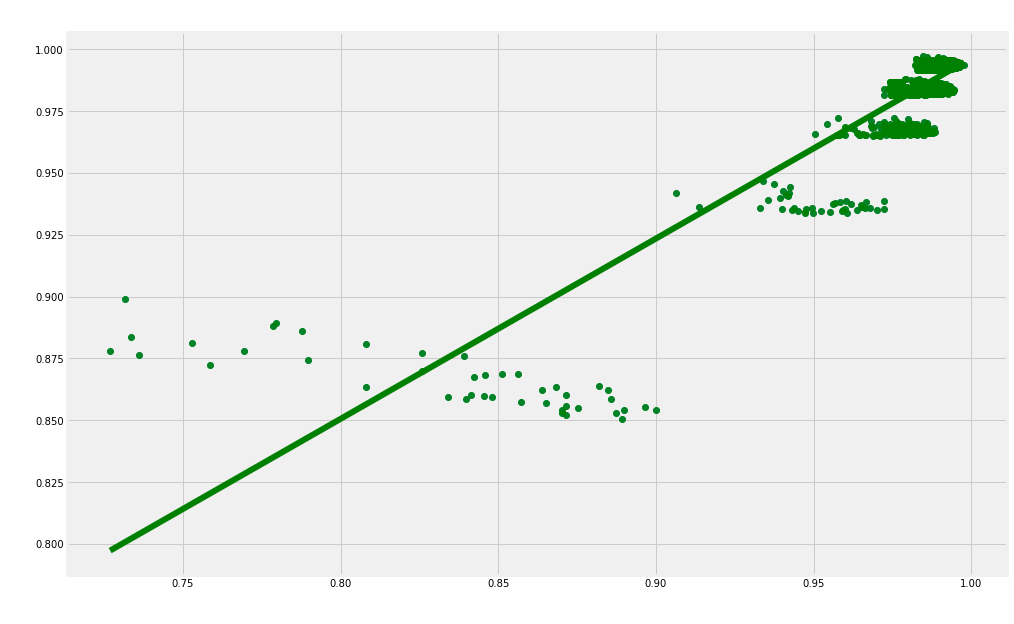

In [88]:
# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 10))
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');
plt.xlabel('Factors', color = 'white', size = 25)
plt.ylabel('Ratings', color = 'white', size = 25)
plt.title('Factors vs. Ratings', color = 'white', size = 25)
plt.show()

In [89]:
diff = pd.DataFrame({'Factors':y_test,'Ratings':y_pred,'Difference':y_test-y_pred})
diff.head(5)

Factors   Ratings  Difference
0  0.988808  0.993449   -0.004641
1  0.985744  0.994135   -0.008391
2  0.987240  0.981760    0.005480
3  0.992712  0.993166   -0.000454
4  0.993036  0.983412    0.009623

In [90]:
import statsmodels.api as sm

stat = sm.add_constant(x_train)
summ = sm.OLS(y_train, stat).fit()

summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3540.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:45:03   Log-Likelihood:                 25306.
No. Observations:                7676   AIC:                        -5.059e+04
Df Residuals:                    7666   BIC:                        -5.052e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0336      0.000   3154.788      0.000       1.033       1.034
x1            -0.1984      0.003    -72.617      0.000      -0.204      -0.193
x2            -0.2000      0.003    -76.393      0.000      -0.205      -0.195
x3            -0.2024      0.003    -79.605      0.000      -0.207      -0.197
x4            -0.1909      0.003    -73.103      0.000      -0.196      -0.186
x5            -0.2024      0.003    -70.231      0.000      -0.208      -0.197
x6            -0.2147      0.002   -128.338      0.000      -0.218      -0.211
x7            -0.1827      0.003    -72.244      0.000      -0.188      -0.178
x8            -0.2049      0.002   -100.388      0.000      -0.209      -0.201
x9            -0.2040      0.002    -94.309      0.000      -0.208      -0.200
==============================================================================
Omnibus:                     7703.428   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1336079.429
Skew:                          -4.511   Prob(JB):                         0.00
Kurtosis:                      67.000   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# model.predict([[x1,x2.....xn]])
y_pred = model.predict(x_test)
print(y_pred)

[0.99344914 0.99413456 0.98175988 ... 0.99479813 0.9832791  0.99319177]


In [92]:
# Model evaluation using Rsquared metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7553074523328617

In [93]:
# Model evaluation using the root mean squared error metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

9.61296520076313e-05

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.0048260940624552315

In [95]:
# calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

Mean Absolute Percentage Error (MAPE): 0.51


In [96]:
# calculate accuracy
print('Accuracy:', round(100*(1 - mape), 2), '%')

Accuracy: 99.49 %
